<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/fluidflow/singlephaseflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Calculation of single phase flow in pipelines
#@markdown This notebook gives an interactive introduction to calculation of single phase flow in pipelines.
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
from neqsim.process.processTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

from neqsim import methods
from neqsim.thermo import fluid, TPflash
from neqsim.process import pipe, pipeline, clearProcess, stream, runProcess

#Litterature
https://petrowiki.org/Pressure_drop_evaluation_along_pipelines

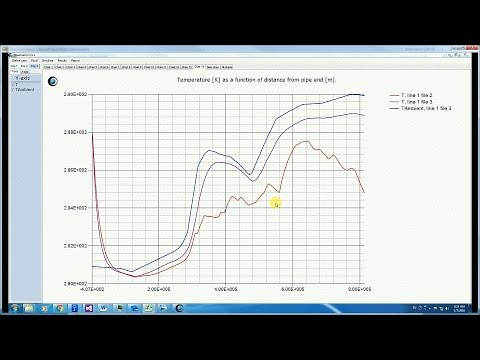

In [12]:
#@title Introduction to hydraulic simulation of pipelines
#@markdown This video gives an intriduction gas flo simulation in pipelines.
from IPython.display import YouTubeVideo
YouTubeVideo('C4mq8QlOOsQ', width=600, height=400)

#Steady state simulation of one phase pipe flow
In the follwoing code we simulate steady state flow of a gas or oil in a pipeline.

##Solving adiabatic flow in a gas pipeline

In [2]:
# Start by creating a fluid in neqsim
fluid1 = fluid("srk")  # create a fluid using the SRK-Eo
fluid1.addComponent("methane", 95.0)
fluid1.addComponent("ethane", 5.0)
fluid1.setMixingRule(2)
fluid1.setTemperature(88.15, "C")
fluid1.setPressure(200.0, "bara")
fluid1.setTotalFlowRate(50.0, "MSm3/day")

stream1 = stream(fluid1)

deltaElevation = 0.0
pipeLength = 500000.0
roughness= 15.0e-6
diameter = 1.0
clearProcess()
pipeSimple = pipe(stream1, pipeLength, deltaElevation, diameter, roughness)
runProcess()
print('pressure out of pipeline ', pipeSimple.getOutStream().getFluid().getPressure('bara'), '[bara]')
printFrame(pipeSimple.getOutStream().getFluid())


pressure out of pipeline  140.22013378829192 [bara]
                          total                 gas                       
            methane      9.5E-1              9.5E-1        [mole fraction]
             ethane        5E-2                5E-2        [mole fraction]
                                                                          
            Density                       8.34502E1               [kg/m^3]
      PhaseFraction                             1E0        [mole fraction]
          MolarMass   1.67444E1           1.67444E1              [kg/kmol]
           Z factor                      9.40239E-1                    [-]
 Heat Capacity (Cp)                       2.97155E0              [kJ/kg*K]
 Heat Capacity (Cv)                        1.9719E0              [kJ/kg*K]
     Speed of Sound                       5.05219E2                [m/sec]
           Enthalpy   1.02539E2           1.02539E2                [kJ/kg]
            Entropy  -1.94273E0          -1.9427

##General solver for flow in a gas pipeline

pressure out of pipeline  161.8643423193716 [bara]
                          total                 gas                       
            methane  9.45039E-1          9.45039E-1        [mole fraction]
             ethane  5.49607E-2          5.49607E-2        [mole fraction]
                                                                          
            Density                       1.57035E2               [kg/m^3]
      PhaseFraction                             1E0        [mole fraction]
          MolarMass   1.68139E1           1.68139E1              [kg/kmol]
           Z factor                       7.5756E-1                    [-]
 Heat Capacity (Cp)                       3.84539E0              [kJ/kg*K]
 Heat Capacity (Cv)                       1.83299E0              [kJ/kg*K]
     Speed of Sound                       4.84114E2                [m/sec]
           Enthalpy  -1.89457E2          -1.89457E2                [kJ/kg]
            Entropy  -2.91205E0          -2.91205

Text(0, 0.5, 'Temperature [C]')

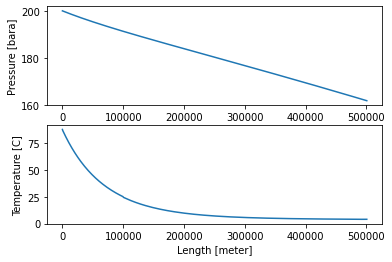

In [11]:


# Start by creating a fluid in neqsim
fluid1 = fluid("srk")  # create a fluid using the SRK-Eo
fluid1.addComponent("methane", 85.0)
fluid1.addComponent("ethane", 5.0)
fluid1.setMixingRule(2)
fluid1.setTemperature(88.15, "C")
fluid1.setPressure(200.0, "bara")
fluid1.setTotalFlowRate(50.0, "MSm3/day")

diameter = [1.0, 1.0, 1.0]
roughness = [15.0e-6, 15.0e-6, 15.0e-6]
position = [0.0, 100000.0, 500000.0]
elevation = [0.0, 0.0, 0.0]
outtemperatures =[278.15, 278.15, 278.15]
outHeatU = [15.0, 15.0, 15.0]
wallHeatU = [15.0, 15.0, 15.0]

clearProcess()
stream1 = stream(fluid1)
pipe1 = pipeline(stream1, position, diameter, elevation, outtemperatures, roughness, outHeatU,wallHeatU)
runProcess()

print('pressure out of pipeline ', pipe1.getOutStream().getFluid().getPressure('bara'), '[bara]')
printFrame(pipe1.getOutStream().getFluid())

length = []
pressure = []
temperature = []
lengthtot = 0.0
for i in range(pipe1.getPipe().getTotalNumberOfNodes()):
  length.append(lengthtot);
  lengthtot = lengthtot+pipe1.getPipe().getNode(i).getLengthOfNode()
  pressure.append(pipe1.getPipe().getNode(i).getBulkSystem().getPressure('bara'))
  temperature.append(pipe1.getPipe().getNode(i).getBulkSystem().getTemperature('C'))

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(length, pressure)
plt.xlabel('Length [meter]')
plt.ylabel('Pressure [bara]')
plt.subplot(2, 1, 2)
plt.plot(length, temperature)
plt.xlabel('Length [meter]')
plt.ylabel('Temperature [C]')